In [98]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [99]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [136]:
tot_je = pd.read_csv('./magazine/final/video_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [137]:
tot_je['ADFN_2'] = tot_je['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [138]:
tot_je['ADFN_2']

0      [좋은, 신, 제니, 제니, 금발머리, 외국인, 같아요, 존나, 예쁘다, 모르겠지만...
1      [애매한, 길이, 생머리, 샤, 네루, 상의, 하얀색, 옷, 거기, 노래, 진짜, ...
2      [지난, 지금, 봐도, 바지, 이해, 할, 수가, 없다, BLACKPINK, 앞선거...
3      [제니, 저런, 스타일링, 진짜, 잘, 어울리고, 멋있다, 스타일링, 대박, ♡, ...
4      [Something, about, this, whole, solo, debut, r...
                             ...                        
346    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
347    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
348    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
349    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
350    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 351, dtype: object

### top50 리스트 생성

In [139]:
top500 = pd.read_csv('./tot_jenny_top500.csv', sep='|', encoding = 'utf-8')

In [140]:
top500

,word,count
0,제니,9276
1,귀엽다,2144
2,예쁘다,1817
3,사랑,805
4,얼굴,671
...,...,...
495,걱정,33
496,맘,33
497,the,33
498,언급,33


In [141]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어']


In [142]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '고급', '라이브', '치마', '자체', '룩', '분위기', '입덕', '세상', '제일', '한국', '좋다']


### top100

In [143]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '고급', '라이브', '치마', '자체', '룩', '분위기', '입덕', '세상', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '블랙', '쿠마', '외모', '매치', '솔로', '멋있다', '나도', '스타일링', '마음', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '좋겠다', '제발', '많은', '스타', '고양이', '남자', '한번', '가장', '대박', '미쳤다', '블링크', '누가', '티', '탑', '브랜드', '곱창', '타팬', '인기', '몸매', '완성', '컴백', '보러', '성격', '심장', '볼']


In [144]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '고급', '라이브', '치마', '자체', '룩', '분위기', '입덕', '세상', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '블랙', '쿠마', '외모', '매치', '솔로', '멋있다', '나도', '스타일링', '마음', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '좋겠다', '제발', '많은', '스타', '고양이', '남자', '한번', '가장', '대박', '미쳤다', '블링크', '누가', '티', '탑', '브랜드', '곱창', '타팬', '인기', '몸매', '완성', '컴백', '보러', '성격', '심장', '볼', '시크', '하이틴', '걸그룹', '좋아요', '밴드', '봄', '라인', '젠', '키', '와이지', '소리', '울', '활동', '입술', '입고', '모델', '미친', '찰떡', 'u', '강아지', '팬츠', '살', '미모', '이미지', '카리스마', '애교', '트와이스', '입', '귀엽', '한국인', '큰', '마지막', '화이트', '좋고', '관심', '어쩜', '까', 'yg', '양갈래', '손', '하루', '집', '아이템', '어울리는', '좋아하는', '짱', '화보', '끝', '기분', '선택', '바지', '곡', '사실', '썸넬', '어깨', '진', '젤', '핑크', '명', '뮤비', '데뷔', '모음', '재킷', '

In [145]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '고급', '라이브', '치마', '자체', '룩', '분위기', '입덕', '세상', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '블랙', '쿠마', '외모', '매치', '솔로', '멋있다', '나도', '스타일링', '마음', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '좋겠다', '제발', '많은', '스타', '고양이', '남자', '한번', '가장', '대박', '미쳤다', '블링크', '누가', '티', '탑', '브랜드', '곱창', '타팬', '인기', '몸매', '완성', '컴백', '보러', '성격', '심장', '볼', '시크', '하이틴', '걸그룹', '좋아요', '밴드', '봄', '라인', '젠', '키', '와이지', '소리', '울', '활동', '입술', '입고', '모델', '미친', '찰떡', 'u', '강아지', '팬츠', '살', '미모', '이미지', '카리스마', '애교', '트와이스', '입', '귀엽', '한국인', '큰', '마지막', '화이트', '좋고', '관심', '어쩜', '까', 'yg', '양갈래', '손', '하루', '집', '아이템', '어울리는', '좋아하는', '짱', '화보', '끝', '기분', '선택', '바지', '곡', '사실', '썸넬', '어깨', '진', '젤', '핑크', '명', '뮤비', '데뷔', '모음', '재킷', '

In [146]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', '사랑', '얼굴', '노래', '무대', '매력', '잘', '아이돌', '옷', '젠득', '여자', '팬', 'CHANEL', '실력', '스타일', '영어', '느낌', '패션', '앞머리', '걸', '눈', '머리', '예능', '랩', '처음', '모습', '춤', '헤어', '컬러', '최고', '표정', '목소리', '멤버', '좋은', '공주', '발음', '연예인', '고급', '라이브', '치마', '자체', '룩', '분위기', '입덕', '세상', '제일', '한국', '좋다', '인간', '썸네일', '의상', '애기', '연출', '레전드', '포인트', '블랙', '쿠마', '외모', '매치', '솔로', '멋있다', '나도', '스타일링', '마음', '가수', '웃기', '대', '메이크업', '레드', '소화', '그룹', '코디', 'YG', '좋겠다', '제발', '많은', '스타', '고양이', '남자', '한번', '가장', '대박', '미쳤다', '블링크', '누가', '티', '탑', '브랜드', '곱창']


### top50만 남기기

In [147]:
len(tot_je)

351

In [148]:
top30_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [149]:
top50_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [150]:
top100_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [151]:
top200_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [152]:
top300_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [153]:
top500_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [154]:
tot_je

,magazine,brand,title,word_jenny,ADFN,ADFN_2
0,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' JENNIE TEASER VID...,"['좋은 신에게 제니 ', '제니언니 금발머리 하니깐 외국인 같아요....존나 예쁘...","['좋은', '신', '제니', '제니', '금발머리', '외국인', '같아요', ...","[좋은, 신, 제니, 제니, 금발머리, 외국인, 같아요, 존나, 예쁘다, 모르겠지만..."
1,YOUTUBE,YOUTUBE,BLACKPINK - JENNIE 'Don't Know What To Do' FOC...,['저 애매한 길이의 생머리와 샤네루 상의랑 하얀색 옷인거 거기에 이노래까지 진짜 ...,"['애매한', '길이', '생머리', '샤', '네루', '상의', '하얀색', '...","[애매한, 길이, 생머리, 샤, 네루, 상의, 하얀색, 옷, 거기, 노래, 진짜, ..."
2,YOUTUBE,YOUTUBE,BLACKPINK - JENNIE 'Forever Young' FOCUSED CAM...,['2년이 지난 지금 봐도 여전히 바지는 이해할 수가 없다..BLACKPINK..얼...,"['지난', '지금', '봐도', '바지', '이해', '할', '수가', '없다'...","[지난, 지금, 봐도, 바지, 이해, 할, 수가, 없다, BLACKPINK, 앞선거..."
3,YOUTUBE,YOUTUBE,BLACKPINK - JENNIE '뚜두뚜두 (DDU-DU DDU-DU)' FOCU...,"['제니 저런 스타일링 진짜 잘 어울리고 멋있다..스타일링이 대박♡', '진짜 미친...","['제니', '저런', '스타', '일링', '진짜', '잘', '어울리고', '멋...","[제니, 저런, 스타일링, 진짜, 잘, 어울리고, 멋있다, 스타일링, 대박, ♡, ..."
4,YOUTUBE,YOUTUBE,JENNIE - 'SOLO' CHOREOGRAPHY CUT TEASER_korean...,['Something about this whole solo debut remind...,"['Something', 'about', 'this', 'whole', 'solo'...","[Something, about, this, whole, solo, debut, r..."
...,...,...,...,...,...,...
346,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
347,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."
348,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
349,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [130]:
item_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

NameError: name 'mag_je' is not defined

### top100이면서 item이 아닌 것

In [15]:
top100_not_item_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [16]:
len(top100_not_item_word)

297

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

In [62]:
top30_word

[['제니',
  '제니',
  '예쁘다',
  '머리',
  '제니',
  '머리',
  '제니',
  '처음',
  '제니',
  '제니',
  '제니',
  '얼굴',
  '예쁘다',
  '예쁘다',
  '제니',
  '사랑'],
 ['옷',
  '노래',
  '예쁘다',
  '제니',
  '노래',
  '노래',
  '제니',
  '노래',
  '노래',
  '예쁘다',
  '제니',
  '제니',
  '제니',
  '제니',
  '예쁘다',
  '예쁘다',
  '예쁘다',
  '사랑',
  '예쁘다',
  '팬',
  '노래',
  '노래',
  '예쁘다',
  '제니',
  '사랑',
  '무대',
  '제니',
  '눈',
  '잘',
  '예쁘다',
  '제니',
  '예쁘다',
  '제니',
  '스타일',
  '노래',
  '머리',
  '제니',
  '제니',
  '예쁘다',
  'CHANEL',
  '예쁘다',
  '제니',
  '잘',
  '제니',
  '예쁘다',
  '예쁘다',
  '눈',
  '사랑',
  '제니',
  '제니',
  '예쁘다',
  '잘',
  '예쁘다',
  '제니',
  '예쁘다',
  '제니',
  '귀엽다',
  '제니',
  '제니',
  '춤',
  '귀엽다',
  '제니',
  '제니',
  '사랑',
  '예쁘다',
  '제니',
  '사랑',
  '노래',
  '제니',
  '춤',
  '제니',
  '팬',
  '제니',
  '제니',
  '무대',
  '제니',
  '예쁘다',
  '머리',
  '노래',
  '사랑',
  'CHANEL',
  '제니',
  '노래',
  '제니',
  '여자',
  '여자',
  '제니',
  '예쁘다',
  '제니',
  'CHANEL',
  '잘',
  '제니',
  '예쁘다',
  '제니',
  '제니',
  '노래',
  '예쁘다',
  '제니',
  'CHANEL',
  '예쁘다',
  'CHANEL',
  '제니',
  '제니',
  '머리',
  

In [49]:
len(top50_word)

351

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [21]:
# 어프라이어리(Apriori)
from apyori import apriori

In [103]:
top30_word[0]

['제니',
 '제니',
 '예쁘다',
 '머리',
 '제니',
 '머리',
 '제니',
 '처음',
 '제니',
 '제니',
 '제니',
 '얼굴',
 '예쁘다',
 '예쁘다',
 '제니',
 '사랑']

In [155]:
# 지지도(support) : P(A∩B)
result = list(apriori(top200_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
225,"(스타일, 제니)",0.316239,"[((), (스타일, 제니), 0.3162393162393162, 1.0), ((스...",2
290,"(패션, 제니)",0.301994,"[((), (패션, 제니), 0.301994301994302, 1.0), ((제니)...",2
160,"(매력, 제니)",0.264957,"[((), (매력, 제니), 0.26495726495726496, 1.0), ((매...",2
84,"(CHANEL, 제니)",0.250712,"[((), (CHANEL, 제니), 0.25071225071225073, 1.0),...",2
144,"(룩, 제니)",0.239316,"[((), (룩, 제니), 0.23931623931623933, 1.0), ((룩)...",2
209,"(사랑, 제니)",0.225071,"[((), (사랑, 제니), 0.22507122507122507, 1.0), ((사...",2
294,"(포인트, 제니)",0.225071,"[((), (포인트, 제니), 0.22507122507122507, 1.0), ((...",2
164,"(매치, 제니)",0.222222,"[((), (매치, 제니), 0.2222222222222222, 1.0), ((매치...",2
288,"(컬러, 제니)",0.219373,"[((), (컬러, 제니), 0.21937321937321938, 1.0), ((제...",2
243,"(얼굴, 제니)",0.216524,"[((), (얼굴, 제니), 0.21652421652421652, 1.0), ((얼...",2


### networkx 그래프 정의

In [156]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [157]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [158]:
pos = nx.spring_layout(G)

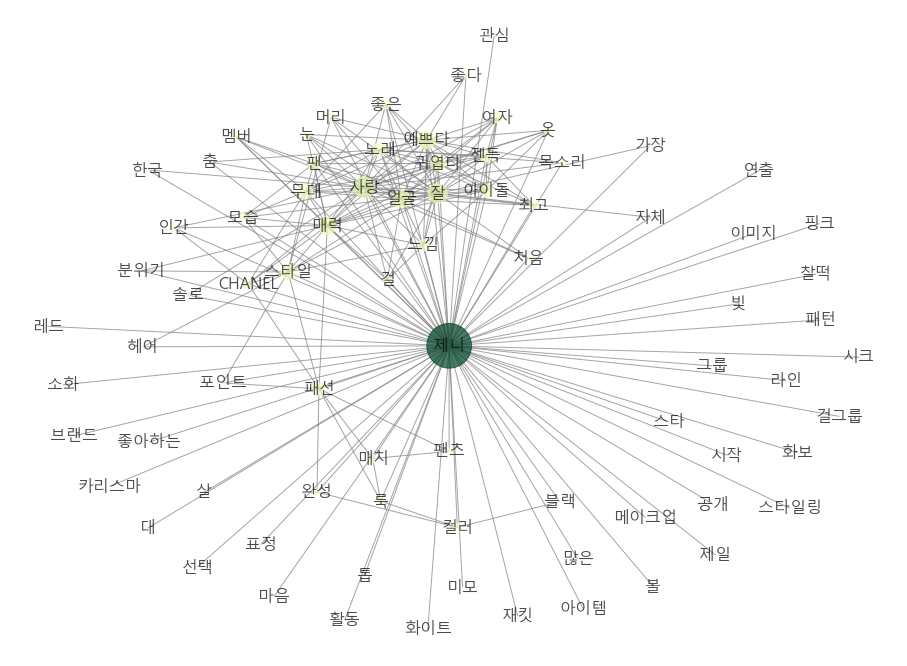

In [159]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./jenny_top50word-min5.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']